## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [159]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [160]:
df = pd.read_csv('ab_data.csv')
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


- "convert" meaning the number of users who decide to pay for the company's product.

b. Use the below cell to find the number of rows in the dataset.

In [161]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [162]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [163]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [164]:
df.groupby(['group','landing_page']).count()

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

### logically, when one of them is present & the other is absent.
- when group is treatment while landing page is the old one. 
- and when group is control while landing page is the new one. 

In [165]:
len(df[(df['group']=='treatment') & (df['landing_page']=='old_page')]) + len(df[(df['group']=='control') & (df['landing_page']=='new_page')])

3893

f. Do any of the rows have missing values?

In [166]:
df.info() # the answer would be NO.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

- we should only use the rows that we can feel confident in the accuracy of the data , so we'll `remove` these rows.

In [167]:
# First, copy our original data frame to another one. 
df2 = df.copy()

# start adjusting.
index_1 = df2[(df2['group']=='treatment') & (df2['landing_page']=='old_page')].index
df2.drop(index_1, inplace=True)

index_2 = df2[(df2['group']=='control') & (df2['landing_page']=='new_page')].index
df2.drop(index_2, inplace=True)

In [168]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [169]:
# disply the shape.
df2.shape

(290585, 5)

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [170]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [171]:
sum(df2.user_id.duplicated())

1

c. What is the row information for the repeat **user_id**? 

In [172]:
# creating is_duplicate column to indicate the repeated user_id's index & other information.

df2["is_duplicate"]= df2.user_id.duplicated()
df2.query('is_duplicate')

,user_id,timestamp,group,landing_page,converted,is_duplicate
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,True


- Since, there is consistency with this id, we can probably just choose either and remove. We shouldn't be counting the same user more than once.

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [173]:
index = df2.query('is_duplicate').index
df2.drop(index , inplace = True)

In [174]:
# check step 1
df2.query('is_duplicate')

,user_id,timestamp,group,landing_page,converted,is_duplicate


In [175]:
# check step 2
sum(df2.user_id.duplicated())

0

In [176]:
# remove is_duplicate column after it's done the required purpose.
df2 = df2.drop('is_duplicate', axis=1)

# display the last shape of df2 so far.
df2.shape

(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [177]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [178]:
(df.query('group=="control"')['converted']).mean()

0.12039917935897611

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [179]:
(df.query('group=="treatment"')['converted']).mean()

0.11891957956489856

d. What is the probability that an individual received the new page?

In [180]:
len(df2[df2['landing_page'] == 'new_page'])/len(df2)

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Considering that the chance of displaying each of the two vesions is equal , where the probability of conversion in either group is relitively the same. Accordingly, there is no sufficient evidence to say that the new treatment page leads to more conversions.**


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

- Null: = **$p_{new}$** - **$p_{old}$** <= 0
- Alternative: **$p_{new}$** - **$p_{old}$** > 0


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [181]:
# under the null means there is no difference in conversion based on the page showed.

p_new = (df2["converted"]).mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [182]:
p_old = (df2["converted"]).mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [183]:
# Get data frame for all records from control group.
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [184]:
# Get data frame for all records from control group.
n_old = df2.query('group == "control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [185]:
new_page_converted = np.random.choice([1,0],n_new,p = [p_new,(1-p_old)])
new_page_converted

array([0, 0, 0, ..., 1, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [186]:
old_page_converted = np.random.choice([1,0],n_old,p = [p_old,(1-p_old)])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [187]:
new_page_converted.mean() - old_page_converted.mean()

-0.0009177035393365257

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [188]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1,0],n_new,p = [p_new,(1-p_new)]
    old_page_converted = np.random.choice([1,0],n_old,p = [p_old,(1-p_old)])
    diff = new_page_converted.mean()  -  old_page_converted.mean()
    p_diffs.append(diff)


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

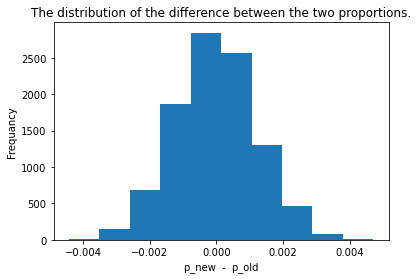

In [192]:
plt.hist(p_diffs)
plt.title('The distribution of the difference between the two proportions.')
plt.xlabel('p_new  -  p_old')
plt.ylabel('Frequancy');

**As we might expect we got a normal distribution of the differences in conversion rate between the new page & the old one by implementing sampling distribution and we got this normally distributed shape according to central limit theorem.**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [193]:
treatment_cr = df2.query('group == "treatment"')['converted'].mean()
control_cr = df2.query('group == "control"')['converted'].mean()
obs_diff = treatment_cr  - control_cr


In [194]:
p_diffs = np.array(p_diffs)
(p_diffs > obs_diff).mean()

0.8987

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**what we did above was trying to find the probability of the observed statistic given that the null hypothesis is definitely TRUE and academically, this value called `p_value`. When it comes to our case if it's larger than our alpha value(0.05 the threshold value) that gives our null hypothesis a stronger advantage over our alternative hypothesis.**



**Accordingly,we do have evidence , with a type 1 error rate of 0.05 , that the conversion rate increases when using the old version of web page more than the new version or at least the same. Because this `P_Value` of 0.9042 leads to keep the null hypothesis of sticking with the old version.In other words , we fail to reject the null.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [247]:
len(df2[(df2['group'] == "treatment") & (df2["converted"])])


17264

In [248]:
len(df2[(df2['group'] == "control") & (df2["converted"])])

17489

In [249]:
import statsmodels.api as sm

convert_old = len(df2[(df2['group'] == "control") & (df2["converted"])])
convert_new = len(df2[(df2['group'] == "treatment") & (df2["converted"])])
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [250]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

convert_old = len(df2[(df2['group'] == "control") & (df2["converted"])])
convert_new = len(df2[(df2['group'] == "treatment") & (df2["converted"])])
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')
p_value , z_score

(0.9050583127590245, 1.3109241984234394)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**They do agree with our previous results. the `p_value` reflects what we've shown above, furthermore, we have 5% as type 1 error which means that we have 2.5% in both sides as a boundries for my rejection regions called critical values as well, so if z_score is less than the critical value that means we failed to reject the null,but if z_score more than the critical value that means we are going to reject the null.The z_score is designed to answer the question of how many standard devision away from the mean our parameter located.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logestic Regression.**
- where we want to predict a categorical variable and it is a regression approach used to predict a particular action whether this person converted or not.

In [251]:
df3=df2.copy()
df3.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [232]:
# creating intercept.
df3['intercept'] = 1

# getting dummies for group column.
group_dummies = pd.get_dummies(df3['group'])

# joining dummies into our data frame.
df3 = df3.join(group_dummies)

# droping control column.
df3 = df3.drop('control', axis=1)

# rename treatment column to ab_page.
df3.rename({'treatment' : 'ab_page'}, axis = 1 , inplace = True)
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


- Now, we are considering that the baseline is the control column.

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [233]:
logit_model = sm.Logit(df3['converted'], df3[['intercept','ab_page']])
results = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [234]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 12 Jan 2021   Pseudo R-squ.:               8.077e-06
Time:                        14:27:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [252]:
np.exp(-0.0150) , np.exp(-1.9888) 

(0.9851119396030626, 0.13685955841614492)

**- For new version, conversion is 0.985 times as likely for treatment version ,holding all other variable constant.**

**- For old version, conversion is 0.136 times as likely for treatment version ,holding all other variable constant.**

**comparing the above 2 statement we are going to find that there is a difference but, not that much difference that makes impact by leading our decision to go for it.**

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p_value associated with ab_page(treatment coulmn) = 0.190 which indicates that it is not statistically significant. The reason it differs from the p_value of part II is that in multiple linear regression the null & the alternative are measureed in a way whether they are equal to zero or not ab_page:** 
$$H_0: B1 = 0$$


$$H_1: B1  \neq 0$$ 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It's a good idea because it leads to consider other factors in our model by which the customer may decide to buy a product as the price of the product , whether there's an installment option or not ,the income of the customer and the age of the customer. All of these may increase the precision of our model which helps us to take the better decision.**

**But, there are two things we need to put into consideration,adding additional factors may lead to multicollinearity which means all of these factors may be correlated to one another and logistic regression requires average or no multicollinearity between independent variables, the second thing is that logistic regression cannot predict continuous outcomes like, age or salary because the scale of them is continous and can not be converted to discrete categories like what we did above with the dummy variables.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [236]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df3.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [237]:
### Create the necessary dummy variables
country_dummies = pd.get_dummies(df_new['country'])
df_new = df_new.join(country_dummies)

# droping control column.
df_new = df_new.drop('US', axis=1)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [240]:
logit_model = sm.Logit(df_new['converted'], df_new[['intercept','ab_page', 'UK', 'CA']])
results = logit_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 12 Jan 2021   Pseudo R-squ.:               2.323e-05
Time:                        14:53:39   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
==============================================================================
"""

In [254]:
np.exp(-0.0149) , np.exp(0.0099) , np.exp(-0.0408)

(0.9852104557227469, 1.0099491671175422, 0.9600211149716509)

                          ### The Interpretation For This Results Would Be: ###

**When a person just sees our new version the conversion rate is 0.985 times likely,holding all factor constant.**

**When a person is from the United kingdom, the conversion rate is 1 times more likely than if he was from United states,holding all factor constant.**

**When a person is from the Canada, the conversion rate is 0.96 times more likely than  if he was from united states,holding all factor constant.**


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [238]:
df_new['CA_page'] = df_new['ab_page'] * df_new['CA']
df_new['UK_page'] = df_new['ab_page'] * df_new['UK']

df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,CA_page,UK_page
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1


- Now, we are considering that the baseline is the control column & US column.

In [239]:
### Fit Your Linear Model And Obtain the Results
logit_model = sm.Logit(df_new['converted'], df_new[['intercept','CA_page','UK_page','ab_page', 'UK', 'CA']])
results = logit_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 12 Jan 2021   Pseudo R-squ.:               3.482e-05
Time:                        14:31:32   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
CA_page       -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_page        0.0314      0.027      1.181      0.238      -0.021       0.084
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
==============================================================================
"""

In [256]:
np.exp(-0.0469) , np.exp(0.0314) , np.exp(-0.0206) , np.exp(-0.0057) , np.exp(-0.0175)

(0.9541828111007262,
 1.0318981806179213,
 0.9796107305032505,
 0.9943162141784332,
 0.9826522356650732)

                ### The Interpretation For This Results Would Be: ###

**When a person sees our new version & he is from Canada, the conversion rate is 0.9541 times as likely,holding all factor constant.**

**When a person sees our new version & he is from United kingdom, the conversion rate is 1.0318 times as likely,holding all factor constant.**


**When a person just sees our new version the conversion rate is 0.97961 times as likely,holding all factor constant.**

**When a person is from the United kingdom, the conversion rate is 0.9943 times more as likely,holding all factor constant.**

**When a person is from the Canada, the conversion rate is 0.9826 times as likely,holding all factor constant.**

<a id='conclusions'></a>
## Conclusions
We did 3 different approaches to know which page version ( old or new) has better performance in terms of conversion rate which are probability , A/B test and Regression,where all of them assured remaining the old one because it has the better performance but with so small difference.Finally, our last decision would be keeping the old page as it is. 

## Sources
- https://www.theclassroom.com/disadvantages-logistic-regression-8574447.html
- https://www.youtube.com/watch?v=zTABmVSAtT0&ab_channel=statisticsfun
- https://www.youtube.com/watch?v=NNpv-n_Hbvc&ab_channel=KhanAcademy
- https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html
